# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Mindy Cruz

[Module 7- Final Repo ](https://github.com/mindy0cruz/Mod7-Final-Project-Article-Summarizer)


Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
#Required packages

from collections import Counter
import pickle
import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import json
import html5lib

!pip list

print('All prereqs installed.')


Package                   VersionAll prereqs installed.

------------------------- --------------
annotated-types           0.7.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.2.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
en_core_web_sm            

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

## Question 1

In [2]:
# url
url = "https://www.wnba.com/news/wnba-delivers-record-setting-2024-season"

# Fetch Content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Fetch Article
    article = soup.find('article')
    
    # Serialize the article HTML to a .pkl file
    with open('article.pkl', 'wb') as file:
        pickle.dump(str(article), file)

    # Print success message
    print("Article saved to article.pkl")


Article saved to article.pkl


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

## Question 2

In [3]:
# Load the article
with open('article.pkl', 'rb') as file:
    article_html = pickle.load(file)

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(article_html, 'html.parser')

# Extract and print the text content of the article
article_text = soup.get_text()
print(article_text)

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Add spacytextblob to the pipeline
nlp.add_pipe("spacytextblob")

# Perform sentiment analysis using TextBlob
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

# Analyze the article text using spaCy
doc = nlp(article_text)
polarity = doc._.blob.polarity

# Determine overall sentiment
if polarity > 0:
    sentiment = "Positive"
elif polarity < 0:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

# Count the number of sentences in the article
num_sentences = len(list(doc.sents))

# Print results
print(f"Polarity Score: {polarity_score:.3f}")
print(f"Sentiment: {sentiment}")
print(f"Number of Sentences: {num_sentences}")

Press ReleaseWNBA Delivers Record-Setting 2024 SeasonOfficial Release– Most-Watched WNBA Regular Season on ESPN Platforms Ever – 
– Set Single-Game Attendance Record and Highest Total Attendance in 22 Years – 
– All-Time Records for Digital Consumption and Merchandise Sales –
NEW YORK, Sept. 27, 2024 – The WNBA delivered its most-watched regular season in 24 years, finished with its highest attendance in 22 years and set records for digital consumption and merchandise sales in 2024.
Highlights from the league’s 28th regular season include:

VIEWERSHIP: The WNBA attracted an all-time record of more than 54 million unique viewers across ABC, CBS, ESPN, ESPN2, ION and NBA TV. A record 22 regular-season game telecasts averaged at least 1 million viewers.  The season was consumed for a record 136.29 million hours across all national networks.  Additional viewership highlights include the following:

This was the most-viewed regular season ever across ESPN platforms with an average of 1.19 m

NameError: name 'TextBlob' is not defined

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

## Question 3

In [ ]:

# Load spaCy model & process
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Filter
tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Print
print("Top 5 Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")


Top 5 Tokens:
Token: wnba, Frequency: 34
Token: season, Frequency: 34
Token: record, Frequency: 14
Token: game, Frequency: 14
Token: million, Frequency: 14


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

## Question 4

In [ ]:
# Load spaCy model & process
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Extract 
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print results
print("5 Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


5 Most Frequent Lemmas:
Lemma: 'wnba', Frequency: 34
Lemma: 'season', Frequency: 34
Lemma: 'game', Frequency: 25
Lemma: 'record', Frequency: 19
Lemma: 'million', Frequency: 14


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 5

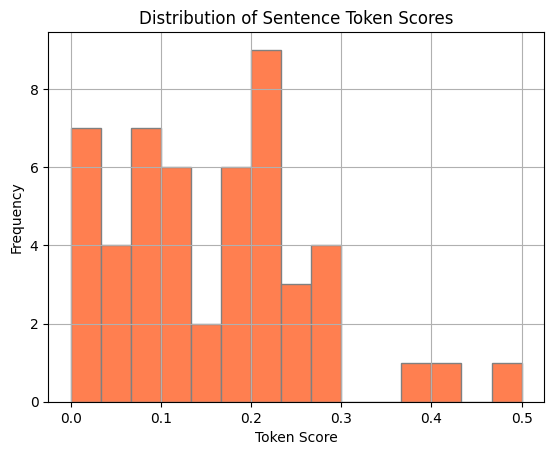

In [ ]:
# Extract Tokens
tokens = [token.text.lower() for token in nlp(article_text) if not token.is_stop and not token.is_punct and not token.is_space]

# Find the most frequent tokens
token_counts = Counter(tokens)
interesting_tokens = [token for token, count in token_counts.most_common(5)]

# Get sentences and calculate their scores
doc = nlp(article_text)
token_scores = [score_sentence_by_token(sent.text, interesting_tokens) for sent in doc.sents]

# Plot histogram
plt.hist(token_scores, bins=15, color='coral', edgecolor='gray')
plt.title('Distribution of Sentence Token Scores')
plt.xlabel('Token Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Most common range of scores is 0.00 to 0.2

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 6

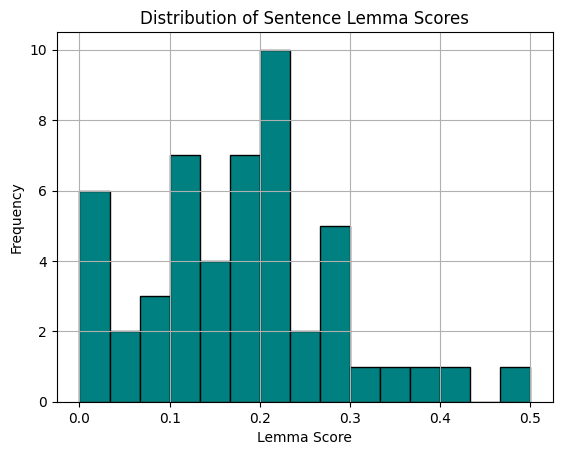

In [ ]:


# Extract lemmas 
lemmas = [token.lemma_.lower() for token in nlp(article_text) if not token.is_stop and not token.is_punct and not token.is_space]

# Find most frequent lemmas
lemmas_counts = Counter(lemmas)
interesting_lemmas = [lemma for lemma, count in lemmas_counts.most_common(5)]

#  Get sentences and calculate their scores
doc = nlp(article_text)
lemmas_scores = [score_sentence_by_lemma(sent.text, interesting_lemmas) for sent in doc.sents]

# Plot histogram
plt.hist(lemmas_scores, bins=15, color='teal', edgecolor='black')
plt.title('Distribution of Sentence Lemma Scores')
plt.xlabel('Lemma Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Most common range of scores is 0.00 to 0.2



## Question 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.2
* Cutoff Score (lemmas): 0.2

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Question 8

In [ ]:
# Initialize an empty list to store the selected sentences
summary_sentences = []

# Loop through each sentence in the article and calculate 
for sent in doc.sents:
    score = score_sentence_by_token(sent.text, interesting_tokens)  
    if score > 0.2:  
        summary_sentences.append(sent.text.strip())  

# Create Summary
summary = ' '.join(summary_sentences)
print(summary)


A record 22 regular-season game telecasts averaged at least 1 million viewers. The season was consumed for a record 136.29 million hours across all national networks. The 2024 season featured the top seven most-watched WNBA games ever on ESPN, the two most-watched WNBA games ever on ABC (2.23 million, Seattle Storm at Indiana Fever on Aug. 18; 1.71 million, Indiana at New York Liberty on May 18) and the most-watched WNBA game ever on ESPN2 (2.12 million, Indiana at Connecticut Sun on May 14). In addition to the 22 regular-season games to average at least 1 million viewers, ABC’s presentation of the 2024 AT&T WNBA All-Star Game delivered a record 3.4 million viewers, an increase of +305% versus last season.



 

ATTENDANCE: The WNBA had its highest total attendance in 22 years (2,353,735), up 48% from last season. Below are additional attendance highlights:

The WNBA averaged 9,807 fans per game, up 48% from last season (6,615 fans). The WNBA set a single-season record with nearly 2 bi

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Question 9

In [ ]:
# Calculate the polarity score 
summary_blob = TextBlob(summary)
summary_polarity_score = summary_blob.sentiment.polarity

# Count 
num_summary_sentences = len(summary_sentences)

# Print
print(f"Summary Polarity : {summary_polarity_score:.3f}")
print(f"Number of sentences in the Summary: {num_summary_sentences}")

Summary Polarity : -0.031
Number of sentences in the Summary: 15


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Question 10

In [ ]:
# Create an empty list to store sentences for the summary
lemma_summary = []

# Set the cutoff score for lemmas
cutoff_score_lemmas = 0.2 

# Loop through each sentence in the article
for sent in doc.sents:
    # Calculate the score of the sentence based on lemmas
    score = score_sentence_by_lemma(sent.text, interesting_lemmas)
    
    # If the score is greater than the cutoff, add the sentence to the summary list
    if score > cutoff_score_lemmas:
        lemma_summary.append(sent.text.strip())

# Generate the summary 
summary_text = ' '.join(lemma_summary)

# Print 
print(summary_text)

A record 22 regular-season game telecasts averaged at least 1 million viewers. The season was consumed for a record 136.29 million hours across all national networks. The 2024 season featured the top seven most-watched WNBA games ever on ESPN, the two most-watched WNBA games ever on ABC (2.23 million, Seattle Storm at Indiana Fever on Aug. 18; 1.71 million, Indiana at New York Liberty on May 18) and the most-watched WNBA game ever on ESPN2 (2.12 million, Indiana at Connecticut Sun on May 14). In addition to the 22 regular-season games to average at least 1 million viewers, ABC’s presentation of the 2024 AT&T WNBA All-Star Game delivered a record 3.4 million viewers, an increase of +305% versus last season.



 

ATTENDANCE: The WNBA had its highest total attendance in 22 years (2,353,735), up 48% from last season. Below are additional attendance highlights:

The WNBA averaged 9,807 fans per game, up 48% from last season (6,615 fans). The Fever’s total home attendance of 340,715 fans wa

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Question 11

In [ ]:
# Perform sentiment analysis
summary_blob = TextBlob(summary_text)
summary_polarity_score = summary_blob.sentiment.polarity

# Calculate
num_summary_sentences = len(lemma_summary)

# Print 
print(f"Polarity- Summary: {summary_polarity_score:.3f}")
print(f"Number of Sentences in the Summary: {num_summary_sentences}")


Polarity- Summary: -0.025
Number of Sentences in the Summary: 17


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

Intial Polarity

Polarity Score: -0.011


Summary Poliarity

Token
Summary Polarity: -0.031

Lemmas
Polarity- Summary: -0.025
  

Comparison:
There is a slight decrease in the Summary polarity scores in comparison to the full article. I would equivialate the additional negativity to not having all the information included in the summary. 


13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I think they are in the ball park and I dont believe there is much of a differnece between the summary vs the whole article. Knowing what I know about the article I would have guessed this article would have had more of a postive polarity. 

In [ ]:
# HTML
import os
os.system('jupyter nbconvert --to html article-summarizer.ipynb')


0